**Importing libraries & dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

In [ ]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data preprocessing**

In [ ]:
churn_data_1 = churn_data.copy()
churn_data_1.TotalCharges = pd.to_numeric(churn_data_1.TotalCharges, errors = 'coerce')
churn_data_1.dropna(how = 'any', inplace=True)
churn_data_1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_data_1.drop(columns = ['customerID'], axis=1, inplace=True)
churn_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data_1['PaymentMethod'] = churn_data_1['PaymentMethod'].str.replace('(automatic)','', regex=False)
churn_data_1.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

**Convert target variable into categorical**

In [ ]:
churn_data_1['Churn'] = np.where(churn_data_1.Churn == 'Yes', 1,0)
churn_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**One Hot Encoding**

In [ ]:
churn_data_1 = pd.get_dummies(churn_data_1)
churn_data_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


**Data Normalization**

In [ ]:
mms = StandardScaler()
churn_data_1[['MonthlyCharges', 'TotalCharges']] = mms.fit_transform(churn_data_1[['MonthlyCharges', 'TotalCharges']])
churn_data_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,-1.161694,-0.994194,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,-0.260878,-0.173740,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,-0.363923,-0.959649,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,-0.747850,-0.195248,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,0.196178,-0.940457,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
X1 = churn_data_1.drop(['Churn'], axis=1)
y1 = churn_data_1['Churn']
X1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,-1.161694,-0.994194,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,-0.260878,-0.173740,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,-0.363923,-0.959649,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,-0.747850,-0.195248,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,0.196178,-0.940457,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,0.664868,-0.129180,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,1.276493,2.241056,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,-1.170004,-0.854514,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,0.319168,-0.872095,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1, stratify=y1)

**Baseline model**

In [ ]:
model = LogisticRegression(solver='saga', penalty='l2', C=0.001, random_state=1, max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('\033[1m' + "Model Accuracy" + '\033[0m')
print("Accuracy of the model is:", accuracy_score(y_test, predictions))
print("\n")
print('\033[1m' + "Confusion Matrix" + '\033[0m')
con_mat = pd.DataFrame(confusion_matrix(y_test, predictions), index=['True[0]','True[1]'], 
                       columns=['Predict[0]', 'Predict[1]'])
print(con_mat)
print("\n")
print('\033[1m' + "Classification Report" + '\033[0m')
print(classification_report(y_test, predictions))

Model Accuracy
Accuracy of the model is: 0.7867803837953091


Confusion Matrix
         Predict[0]  Predict[1]
True[0]         949          84
True[1]         216         158


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.65      0.42      0.51       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



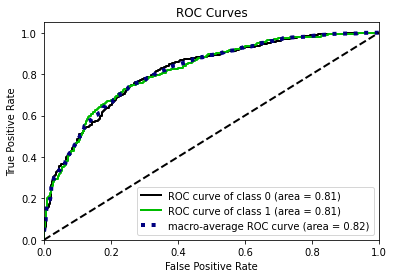

In [ ]:
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), plot_micro=False)
plt.show()

**SMOTE Technique**

In [ ]:
print('\033[1m' + "Distribution of Target Variable Churn before Upsampling" + '\033[0m')
print(churn_data_1['Churn'].value_counts())
print("\n")

Distribution of Target Variable Churn before Upsampling
0    5163
1    1869
Name: Churn, dtype: int64




In [ ]:
X_os = churn_data_1.loc[:, churn_data_1.columns != 'Churn']
y_os = churn_data_1.loc[:, churn_data_1.columns == 'Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
Xos_train, Xos_test, yos_train, yos_test = train_test_split(X_os, y_os, test_size=0.3, random_state=0)
columns = Xos_train.columns

In [ ]:
os_data_X,os_data_y=os.fit_resample(Xos_train, yos_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

In [ ]:
# Checking the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of NO churn in oversampled data:",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn:",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of NO churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

Length of oversampled data is  7216
Number of NO churn in oversampled data: 3608
Number of churn: 3608
Proportion of NO churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


**Feature Selection**




In [ ]:
df_final_vars=churn_data_1.columns.values.tolist()
y=['Churn']
X=[i for i in df_final_vars if i not in y]

In [ ]:
from sklearn.feature_selection import RFE

logregress = LogisticRegression(solver='liblinear', penalty='l2', C=0.001, random_state=1, max_iter=2000);

In [ ]:
rfe = RFE(logregress, step=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)


[False False  True False False False False False False  True False  True
  True False False  True  True False  True False  True  True False  True
  True False False  True False  True False False  True False False False
  True  True  True  True False  True  True  True  True]


In [ ]:
print(rfe.ranking_)

[3 3 1 3 3 3 3 3 2 1 3 1 1 3 3 1 1 3 1 3 1 1 3 1 1 3 3 1 3 1 3 3 1 3 3 2 1
 1 1 1 2 1 1 1 1]


In [ ]:
# Showing features selected by RFE
ranking = rfe.support_
df_r = pd.DataFrame(ranking)
df_x = churn_data_1.copy()
df_x.drop(['Churn'], axis=1, inplace=True)
columns_x = df_x.columns.values
df_col = pd.DataFrame(columns_x)
df_ranking = df_col.merge(df_r, left_index=True, right_index=True, how='inner')
df_features = df_ranking.loc[df_ranking['0_y'] == True]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0_x     22 non-null     object
 1   0_y     22 non-null     bool  
dtypes: bool(1), object(1)
memory usage: 374.0+ bytes


In [ ]:
cols=["MonthlyCharges","Dependents_Yes","PhoneService_Yes","MultipleLines_No","InternetService_DSL",\
      "InternetService_Fiber optic","OnlineSecurity_No","OnlineSecurity_Yes", "OnlineBackup_No", "OnlineBackup_Yes",\
      "DeviceProtection_No","TechSupport_No","TechSupport_Yes","StreamingTV_Yes", "Contract_Month-to-month",\
      "Contract_One year", "Contract_Two year","PaperlessBilling_No", "PaymentMethod_Bank transfer ",\
      "PaymentMethod_Credit card ", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check"] 
X=os_data_X[cols]
y=os_data_y["Churn"]

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.429982
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.380    
Dependent Variable:      Churn                 AIC:                   6249.5062
Date:                    2022-04-29 23:43      BIC:                   6400.9554
No. Observations:        7216                  Log-Likelihood:        -3102.8  
Df Model:                21                    LL-Null:               -5001.8  
Df Residuals:            7194                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [ ]:
cols=["Dependents_Yes","PhoneService_Yes","MultipleLines_No","InternetService_DSL",\
      "InternetService_Fiber optic","OnlineSecurity_Yes", "OnlineBackup_Yes",\
      "TechSupport_Yes","StreamingTV_Yes", "Contract_Month-to-month",\
      "Contract_Two year","PaperlessBilling_No", "PaymentMethod_Bank transfer ",\
      "PaymentMethod_Credit card ", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check"] 
X=os_data_X[cols]
y=os_data_y["Churn"]

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.430582
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.379    
Dependent Variable:      Churn                 AIC:                   6246.1529
Date:                    2022-04-29 23:43      BIC:                   6356.2978
No. Observations:        7216                  Log-Likelihood:        -3107.1  
Df Model:                15                    LL-Null:               -5001.8  
Df Residuals:            7200                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

**Updated LR Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logregress = LogisticRegression(solver='liblinear', penalty='l2', C=0.001, random_state=1, max_iter=1000)
log_model = logregress.fit(X_train, y_train)

In [ ]:
predictions_1 = log_model.predict(X_test)
print('\033[1m' + "Model Accuracy" + '\033[0m')
print('Accuracy of the model is: {:.2f}'.format(log_model.score(X_test, y_test)))
print("\n")
print('\033[1m' + "Confusion Matrix" + '\033[0m')
con_mat = pd.DataFrame(confusion_matrix(y_test, predictions_1), index=['True[0]','True[1]'], 
                       columns=['Predict[0]', 'Predict[1]'])
print(con_mat)
print("\n")
print('\033[1m' + "Classification Report" + '\033[0m')
print(classification_report(y_test, predictions_1))

Model Accuracy
Accuracy of the model is: 0.79


Confusion Matrix
         Predict[0]  Predict[1]
True[0]         794         270
True[1]         186         915


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1064
           1       0.77      0.83      0.80      1101

    accuracy                           0.79      2165
   macro avg       0.79      0.79      0.79      2165
weighted avg       0.79      0.79      0.79      2165



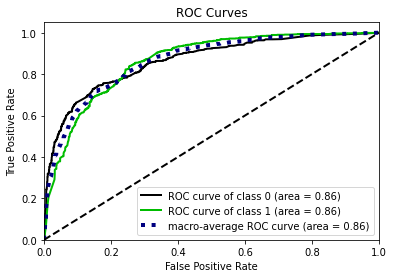

In [ ]:
skplt.metrics.plot_roc(y_test, logregress.predict_proba(X_test), plot_micro=False)
plt.show()

**Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X, y)

In [ ]:
params = result.best_params_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logregress = LogisticRegression(solver='newton-cg', penalty='none', C=0.02168582943574917)
logregress.fit(X_train, y_train)
predictions_2 = logregress.predict(X_test)
print('\033[1m' + "Model Accuracy" + '\033[0m')
print("Accuracy of the model is:", (accuracy_score(y_test, predictions_2)*100))
print("\n")
print('\033[1m' + "Confusion Matrix" + '\033[0m')
con_mat = pd.DataFrame(confusion_matrix(y_test, predictions_2), index=['True[0]','True[1]'], 
                       columns=['Predict[0]', 'Predict[1]'])
print(con_mat)
print("\n")
print('\033[1m' + "Classification Report" + '\033[0m')
print(classification_report(y_test, predictions_2))

Model Accuracy
Accuracy of the model is: 81.20092378752886


Confusion Matrix
         Predict[0]  Predict[1]
True[0]         838         226
True[1]         181         920


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1064
           1       0.80      0.84      0.82      1101

    accuracy                           0.81      2165
   macro avg       0.81      0.81      0.81      2165
weighted avg       0.81      0.81      0.81      2165



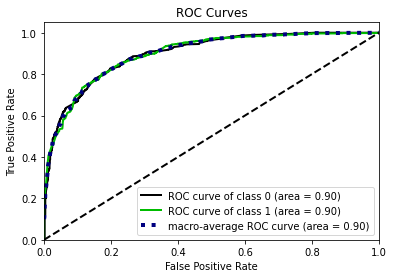

In [ ]:
skplt.metrics.plot_roc(y_test, logregress.predict_proba(X_test), plot_micro=False)
plt.show()